<a href="https://colab.research.google.com/github/KhresnaPanduI/ASL_modelmaker/blob/main/ASL_efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 9.2MB/s 
     |████████████████████████████████| 122kB 17.8MB/s 
     |████████████████████████████████| 1.1MB 18.6MB/s 
     |████████████████████████████████| 686kB 51.9MB/s 
     |████████████████████████████████| 645kB 55.4MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 112kB 61.4MB/s 
     |████████████████████████████████| 849kB 61.0MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 6.3MB 52.7MB/s 
     |████████████████████████████████| 1.2MB 49.4MB/s 
     |████████████████████████████████| 174kB 55.8MB/s 
     |████████████████████████████████| 194kB 53.3MB/s 
     |████████████████████████████████| 358kB 50.5MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 38.2MB 69kB/s 


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import numpy 

In [5]:
#load dataset
image_path = '/content/drive/MyDrive/Datasets/combined asl'
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 5798, num_label: 29, labels: A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z, del, nothing, space.


In [8]:
#training
model = image_classifier.create(train_data, 
                                validation_data=test_data,
                                epochs=50, 
                                dropout_rate=0.1,
                                shuffle=True)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 29)                37149     
Total params: 3,450,173
Trainable params: 37,149
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


163/163 [==============================] - 79s 475ms/step - loss: 2.5817 - accuracy: 0.4254 - val_loss: 1.8756 - val_accuracy: 0.7865
Epoch 2/50
163/163 [==============================] - 22s 134ms/step - loss: 1.6135 - accuracy: 0.8259 - val_loss: 1.3845 - val_accuracy: 0.9236
Epoch 3/50
163/163 [==============================] - 22s 135ms/step - loss: 1.2774 - accuracy: 0.9181 - val_loss: 1.1746 - val_accuracy: 0.9618
Epoch 4/50
163/163 [==============================] - 22s 136ms/step - loss: 1.1269 - accuracy: 0.9444 - val_loss: 1.0713 - val_accuracy: 0.9705
Epoch 5/50
163/163 [==============================] - 23s 142ms/step - loss: 1.0438 - accuracy: 0.9620 - val_loss: 1.0059 - val_accuracy: 0.9740
Epoch 6/50
163/163 [==============================] - 24s 148ms/step - loss: 0.9902 - accuracy: 0.9730 - val_loss: 0.9647 - val_accuracy: 0.9774
Epoch 7/50
163/163 [==============================] - 27s 164ms/step - loss: 0.9548 - accuracy: 0.9778 - val_loss: 0.9309 - val_accuracy: 0.9

Evaluate model

In [16]:
loss, accuracy = model.evaluate(test_data)

19/19 [==============================] - 7s 96ms/step - loss: 0.7722 - accuracy: 0.9931


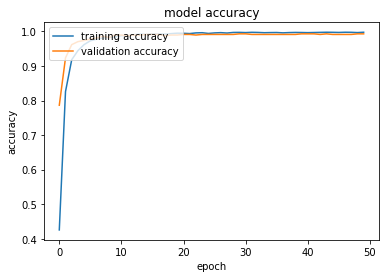

In [15]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [17]:
model.export(export_dir='.', tflite_filename='ASL_effficientNet.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpx9zprzqq/assets


INFO:tensorflow:Assets written to: /tmp/tmpx9zprzqq/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpgwtbdvbu/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpgwtbdvbu/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./ASL_effficientNet.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./ASL_effficientNet.tflite


In [18]:
from google.colab import files
files.download('ASL_effficientNet.tflite') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>